In [1]:
# Importing required libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error


In [2]:
# Loading Data in the DataFrame
df = pd.read_csv('austin_weather.csv')

In [3]:
# Creating a DataFrame with only Average Temperature feature
temp_df = df[['TempAvgF']]

# Parsing Date
temp_df.index = pd.to_datetime(df[['Date']].stack(), format='%Y%m%d', errors='ignore')

trend = np.linspace(0, len(temp_df)-1, 50, dtype='int64')
temp_df.head()

,TempAvgF
2013-12-21,60
2013-12-22,48
2013-12-23,45
2013-12-24,46
2013-12-25,50


<Figure size 5760x2880 with 0 Axes>

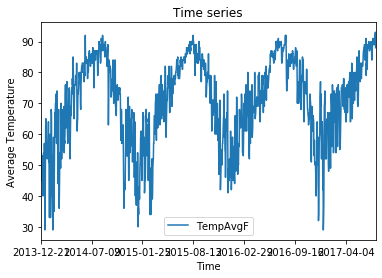

In [4]:
# Plotting temperature vs time graph
plt.figure(figsize=(80, 40))
temp_df.plot()
plt.title('Time series')
plt.xlabel('Time')
plt.ylabel('Average Temperature')
plt.show()

In [5]:
# copy_data = temp_df
# Transforming features by scaling each feature using Sklearn's MinMaxScaler.
scaler = MinMaxScaler(feature_range=(-1, 1))

In [6]:
data_training = temp_df.iloc[:1000]
data_test = temp_df.iloc[1000:]

# Function to create data array sequences and prediction array sequences
def make_data(data_frame, history):
    sequences = []
    sequ_pred = []
    values = data_frame['TempAvgF'].values
    for i in range(len(values)-history-1):
        sequences.append(values[i:i+history])
        sequ_pred.append(values[i+history+1])
    return np.array(sequences), np.array(sequ_pred)

# Specifying the size of the history to call make_data function
hist_size = 20

train_x, train_y = make_data(data_training, hist_size)
test_x, test_y = make_data(data_test, hist_size)

In [7]:
# Scaling the training data and reshaping it for input
test_x = scaler.fit_transform(test_x)
train_x = scaler.fit_transform(train_x)

train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

In [8]:
#Building the model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(20, 1)))
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [9]:
# Fit the model
history = model.fit(train_x, train_y, epochs=200, verbose=0, validation_data=(test_x, test_y), batch_size=20)

In [10]:
# Predicting and storing the predicted values
predictions = model.predict(test_x)

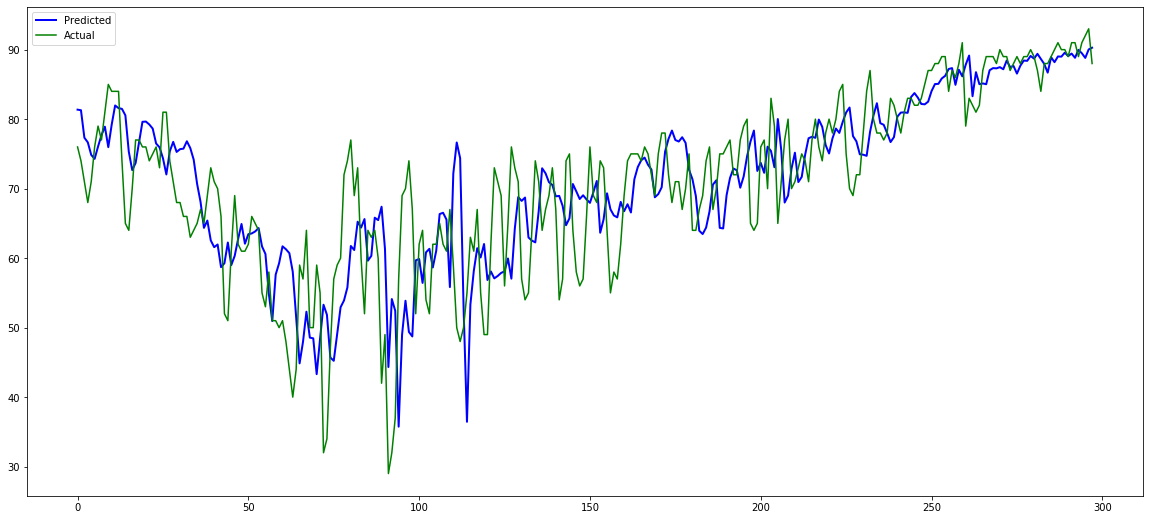

In [11]:
# Plotting the actual and predicted values for comparision
plt.figure(figsize=(20, 9))
plt.plot(predictions, color='blue', linewidth=2)
plt.plot(test_y, color='green')
plt.legend(('Predicted', 'Actual'))
plt.show()

In [12]:
# Using the array of predictions to evaluate the prediction accuracy of the model
print("The Explained Variance: %.2f" % explained_variance_score(test_y, predictions))  
print("The Mean Absolute Error: %.2f degrees Farenheit" % mean_absolute_error(test_y, predictions))  
print("The Median Absolute Error: %.2f degrees Farenheit" % median_absolute_error(test_y, predictions))

The Explained Variance: 0.58
The Mean Absolute Error: 6.17 degrees Farenheit
The Median Absolute Error: 4.87 degrees Farenheit
